In [1]:
from fineNeat import loadHyp, updateHyp, load_task, GymTask, games 
from fineNeat import Neat, Ind, viewInd, fig2img 
from matplotlib import pyplot as plt 
from tqdm import tqdm 
import numpy as np 


game = games["slimevolley"]
task = GymTask(game)

hyp_default = 'fineNeat/fineNeat/p/default_sneat.json'
hyp_adjust = "fineNeat/fineNeat/p/volley.json"
fileName = "volley"

hyp = loadHyp(pFileName=hyp_default, load_task=load_task)
updateHyp(hyp,load_task,hyp_adjust)

# hyper-parameter adjustment to enable speciation
hyp["cap_layer"] = 3
hyp["spec_thresh"] = 0.9
hyp['spec_target'] = 8
hyp['spec_compatMod'] = 0.01
hyp['spec_threshMin'] = 0.2
neat = Neat(hyp)

In [2]:
game.layers

[10, 10]

#### Population TestBed 

In [2]:
neat.initPop() # fixed naive input-output topology + random weight / on & off 

# pop_frames = []
test_loops = 10000
for test_iter in tqdm(range(test_loops)): 
    curr_pop = neat.ask() # ask 
    # grid_img = neat.printSpecies(neat.species, mute=True) # ask : visualize current population species 
    reward = np.random.rand(len(curr_pop)) # assign random reward values 
    neat.tell(reward) # tell : assign fitness to current population 
    # pop_frames.append(grid_img)

# pop_frames[0].save("neatspecies.gif", save_all=True, append_images=pop_frames[1:], duration=100, loop=0) # save frames to gif

  6%|▌         | 621/10000 [13:09<3:18:47,  1.27s/it] 


KeyboardInterrupt: 

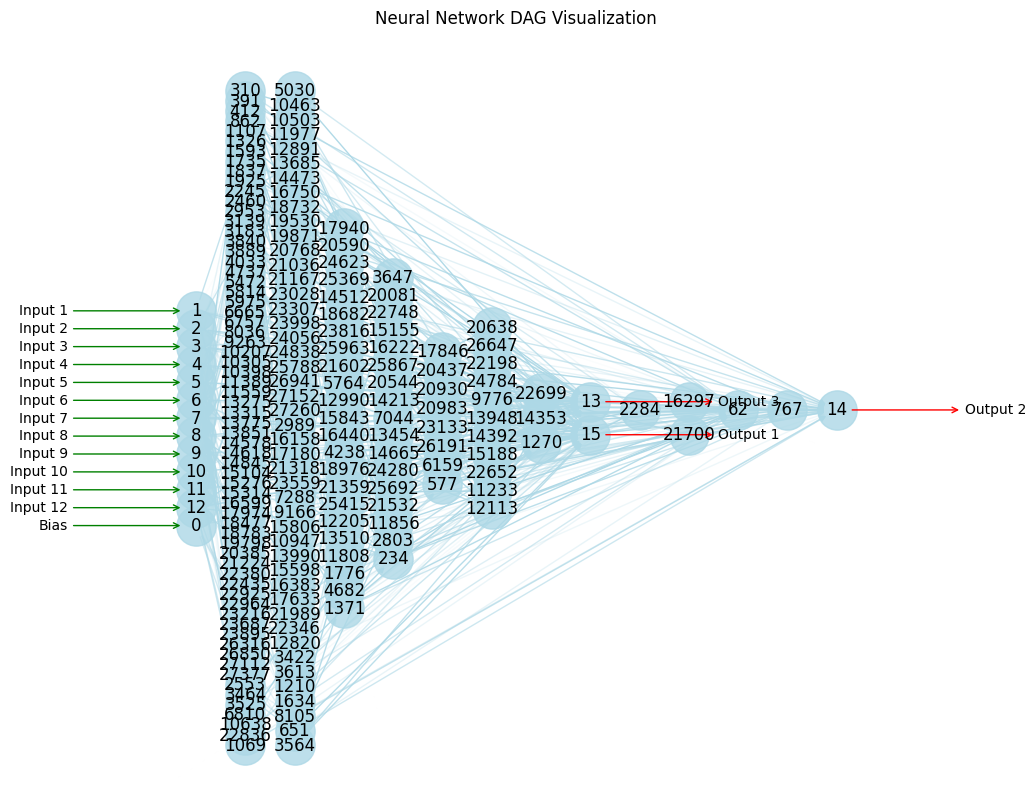

In [10]:
len(neat.species)
spec_ind = neat.species[4].seed
fig, ax = viewInd(spec_ind)
# fig.savefig("spec_ind.png")


In [3]:
neat.printSpecies(neat.species, mute=True)

KeyboardInterrupt: 

In [11]:
pop_frames[1].save("Neatspecies.gif", save_all=True, append_images=pop_frames[2:], duration=100, loop=0) # save frames to gif

#### Mutation TestBed 

In [2]:
from fineNeat import viewInd, fig2img, Ind, check_sparse_issue
import matplotlib.pyplot as plt 
from tqdm import tqdm 
import numpy as np 
ind = Ind.from_shapes([[12, 10],[10, 10],[10, 3]])
frames = []


for i in tqdm(range(40)):

    connG, nodeG = np.copy(ind.conn), np.copy(ind.node)
    connG[3,:] = 1
    
    # child, _ = ind.createChild(p=hyp, innov=None, gen=i)
    connG, nodeG, _ = ind.mutAddNode(connG, nodeG, gen=1, innov=None, p=hyp)
    assert check_sparse_issue(nodeG, connG), "Sparse issue found after mutAddNode"
    childA = Ind(connG, nodeG)
    childA.express() 
    
    connG, nodeG, _ = childA.mutSparsity(p=hyp)
    assert check_sparse_issue(nodeG, connG), "Sparse issue found after mutSparsity"
    
    # fine_addnode = Ind(connG, nodeG).express()
    # connG, nodeG, _ = ind.mutAddConn(connG, nodeG, gen=1, innov=None)
    child = Ind(connG, nodeG)
    
    
    if child.express():
        fig, ax = viewInd(child)
        frames.append(fig2img(fig))
        plt.close(fig)
        ind = child
    else: 
        print("Failed to express child")

# frames[0].save("addSparseNode.gif", save_all=True, append_images=frames[1:], duration=100, loop=0) # save frames to gif

100%|██████████| 40/40 [00:23<00:00,  1.67it/s]


In [3]:
frames[0].save("addSparseNode.gif", save_all=True, append_images=frames[1:], duration=100, loop=0) # save frames to gif

#### Population TestBed 

In [8]:
# Test population 
from fineNeat import Ind 
import gym

env = gym.make("SlimeVolley-v0")

population_size = 20
population = [Ind.from_shapes([(game.input_size, 5), (5, game.output_size)]) for _ in range(population_size)]